<a href="https://colab.research.google.com/github/bbucalonserra/body-fat-prediction/blob/main/Body_Fat_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Body Fact Prediction

## 1 Objectives

The objective of this analysis is to create a machine learning model using regression to predict the BodyFat using other informations from people bodies. For this, the core insight is to understand what attributes more influences in the Body Fat percentage.

In [1]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 2.0 MB/s eta 0:00:00


In [64]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import chardet
import requests
import warnings
import statistics
from scipy.stats import bartlett
from scipy.stats import *
from scipy import stats as st
from statsmodels.graphics.gofplots import qqplot
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
import pingouin as pg
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Data Catalog


| Data                   | Data Type    | Description                                                  | Unit              | Example  |
|------------------------|--------------|--------------------------------------------------------------|-------------------|----------|
| Density                | Numeric      | Density determined from underwater weighing                  | g/cm³             | 1.045 g/cm³ |
| BodyFat                | Numeric      | Percent body fat from Siri's (1956) equation                 | Percentage (%)    | 20%      |
| Age                    | Numeric      | Age (years)                                                  | Years             | 30 years  |
| Weight                 | Numeric      | Weight (lbs)                                                 | Pounds (lbs)      | 150 lbs  |
| Height                 | Numeric      | Height (inches)                                              | Inches (in)       | 70 inches|
| Neck                   | Numeric      | Neck circumference (cm)                                      | Centimeters (cm)  | 35 cm    |
| Chest                  | Numeric      | Chest circumference (cm)                                     | Centimeters (cm)  | 95 cm    |
| Abdomen                | Numeric      | Abdomen 2 circumference (cm)                                 | Centimeters (cm)  | 85 cm    |
| Hip                    | Numeric      | Hip circumference (cm)                                       | Centimeters (cm)  | 100 cm   |
| Thigh                  | Numeric      | Thigh circumference (cm)                                     | Centimeters (cm)  | 60 cm    |
| Knee                   | Numeric      | Knee circumference (cm)                                      | Centimeters (cm)  | 40 cm    |
| Ankle                  | Numeric      | Ankle circumference (cm)                                     | Centimeters (cm)  | 25 cm    |
| Biceps (extended)      | Numeric      | Biceps (extended) circumference (cm)                          | Centimeters (cm)  | 30 cm    |
| Forearm                | Numeric      | Forearm circumference (cm)                                   | Centimeters (cm)  | 25 cm    |
| Wrist                  | Numeric      | Wrist circumference (cm)                                     | Centimeters (cm)  | 15 cm    |


## 2 Data Collection

### 2.1 Encoding

In [3]:
# Download the file from URL
url = 'https://raw.githubusercontent.com/bbucalonserra/body-fat-prediction/main/bodyfat.csv'
response = requests.get('https://raw.githubusercontent.com/bbucalonserra/body-fat-prediction/main/bodyfat.csv')

# Detect the encoding
result = chardet.detect(response.content)

# Now, let's collect the encoding and the confiance
encoding = result['encoding']
confiance = result['confidence']

# Print result
print(f"The encoding of the file is {encoding} with a confiance of {confiance}")

The encoding of the file is ascii with a confiance of 1.0


The encoding of the archieve is ASCII (American Standard Code for Information Interchange) with 100% of confiance. Now we can read the file properly.

In [4]:
# Reading CSV file
body_fat_df = pd.read_csv('https://raw.githubusercontent.com/bbucalonserra/body-fat-prediction/main/bodyfat.csv', encoding = 'ascii')

### 2.2 Data Types

In [5]:
# Check for data types
body_fat_df.dtypes

,0
Density,float64
BodyFat,float64
Age,int64
Weight,float64
Height,float64
Neck,float64
Chest,float64
Abdomen,float64
Hip,float64
Thigh,float64


According to the data types above, all attributes are properly set with float and integer.

There is no nulls, nans and missing in our dataset.

### 2.3 First and Last Rows

In [6]:
# First rows
body_fat_df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [7]:
# Last rows
body_fat_df.tail()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


## 3 Descriptive Statistics

First of all, since there is no categorical values, let's create categories according to age in order to group the samples.

**NOTE**: it should be an excellent idea create also groups according to body fat, but, since the differences among fat are way different from woman and man, and, there is no gender attribue, we shouldn't create it.

In [8]:
# Defining conditions and values
conditions = [
    (body_fat_df['Age'] >= 18) & (body_fat_df['Age'] <= 30),
    (body_fat_df['Age'] >= 40) & (body_fat_df['Age'] <= 60),
    (body_fat_df['Age'] >= 18) & (body_fat_df['Age'] <= 59),
    (body_fat_df['Age'] >= 60)
]

# Creating list with categories
values = ['Young-Adult', 'Middle-Aged-Adult', 'Elderly', 'Professional-Adult']

# Creating new attribute
body_fat_df['AgeGroup'] = np.select(conditions, values)

### 3.1 Data Types

In [9]:
# Check for data types
body_fat_df.dtypes

,0
Density,float64
BodyFat,float64
Age,int64
Weight,float64
Height,float64
Neck,float64
Chest,float64
Abdomen,float64
Hip,float64
Thigh,float64


### 3.2 Null, NaNs and Missings

In [10]:
# Creating variable for the percentage of nulls
null = body_fat_df.isnull().sum() /body_fat_df.shape[0]

# Display
display(null)

,0
Density,0.0
BodyFat,0.0
Age,0.0
Weight,0.0
Height,0.0
Neck,0.0
Chest,0.0
Abdomen,0.0
Hip,0.0
Thigh,0.0


### 3.3 Skewness

In [11]:
# Defining the simetry of each numerical attribute
skewness = []
for column in body_fat_df.columns:
  if body_fat_df[column].dtypes != 'object':
    skewness.append(body_fat_df[column].skew())
    print(f"{column} = {body_fat_df[column].skew().round(2)}")

Density = -0.02
BodyFat = 0.15
Age = 0.28
Weight = 1.21
Height = -5.38
Neck = 0.55
Chest = 0.68
Abdomen = 0.84
Hip = 1.5
Thigh = 0.82
Knee = 0.52
Ankle = 2.26
Biceps = 0.29
Forearm = -0.22
Wrist = 0.28


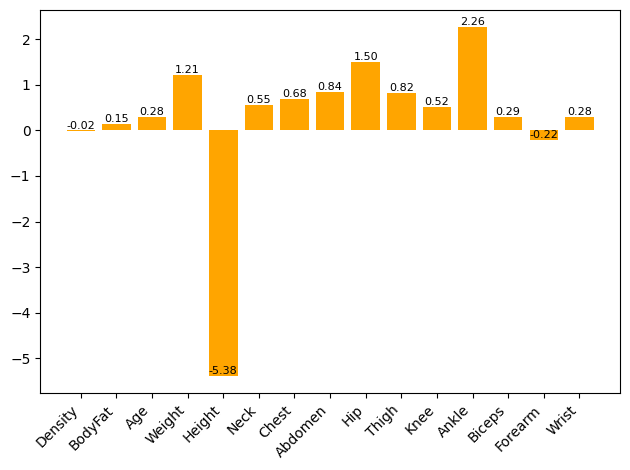

In [12]:
# Plot into a bar chart
plt.bar(range(len(skewness)), skewness, color='orange')
for i, skew in enumerate(skewness):
    plt.text(i, skew, f'{skew:.2f}', ha='center', va='bottom', color='black', fontsize=8)
numeric_columns = [col for col in body_fat_df.columns if body_fat_df[col].dtype != 'object']
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Knowing that a **skewness of 0 indicates a perfect simetry** and **considering that attributes with skewness between -1 and 1 could be considered simetric**, there are 3 attributes that deviates from this parameter:

  * Weight = 1.21
  * Hip = -5.38
  * Ankle = 2.26

With this, these 3 attributes indicates an assimetry of data. The positive ones shows us a long tail to the left and the negative one a long tail to the right.

### 3.4 Kurtosis

Calculating the Kurtosis

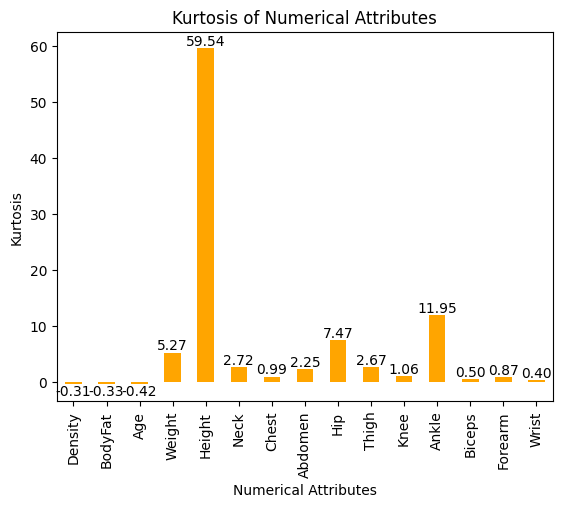

In [13]:
# Select only numeric columns
numeric_columns = body_fat_df.select_dtypes(include=['number'])

# Calculate kurtosis
kurtosis = numeric_columns.kurtosis()

# Plot into a bar chart
kurtosis.plot(kind='bar', color='orange')
plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.xlabel('Numerical Attributes')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Numerical Attributes')
plt.show()

**Positive kurtoses indicate more concentrated distributions with heavier tails (higher values on y axis), while negative kurtoses indicate flatter distributions**, knowing this:

- Density, BodyFat, Age: Negative kurtoses, suggesting a flatter distributions than the normal distribution.
- Weight, Height, Neck, Chest, Abdomen, Thigh, Knee, Biceps, Forearm, Wrist: Positive kurtoses, indicating more concentrated distributions with heavier tails.
- Hip, Ankle: Extremely high positive kurtoses suggest extremely concentrated distributions with very heavy tails. These values may need verification.


As we can see above, all attributes has a few outliers, only **Age** doesn't.

Knowing this, let's check a general overview of the dataset to validate if the outleirs are wrong values that should be fixed or they are correct and should be kept.

### 3.5 Coefficient of Variation

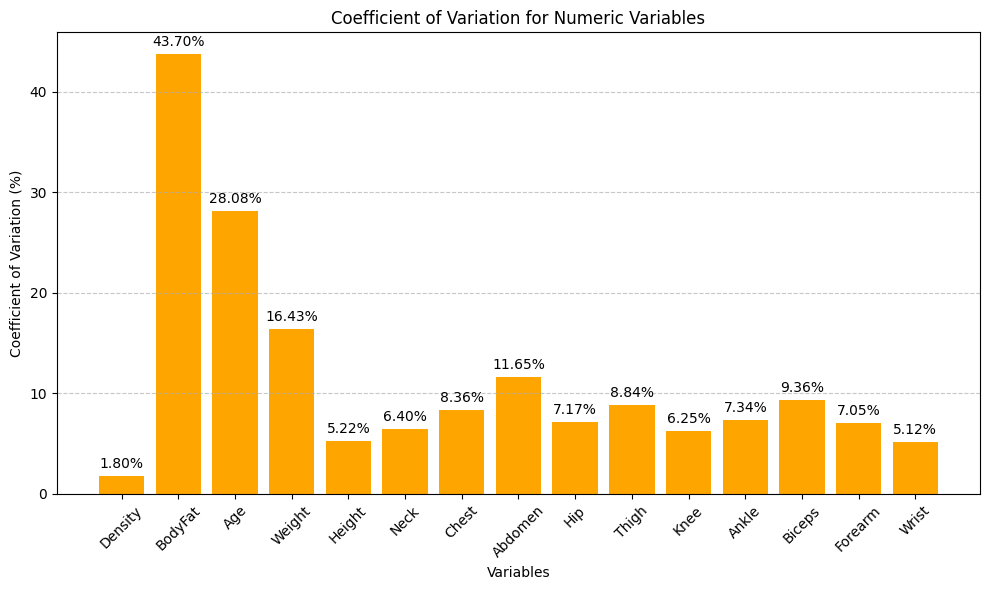

In [14]:
# Calculate coefficient of variation for each numeric column
cv_dict = {}

for column in body_fat_df.columns:
    if pd.api.types.is_numeric_dtype(body_fat_df[column]):
        # Calculate mean and standard deviation
        mean_value = np.mean(body_fat_df[column])
        std_dev = statistics.stdev(body_fat_df[column])

        # Calculate coefficient of variation
        coefficient_variation = (std_dev / mean_value) * 100

        # Store the result in the dictionary
        cv_dict[column] = coefficient_variation

# Prepare data for bar chart
columns = list(cv_dict.keys())
cv_values = list(cv_dict.values())

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(columns, cv_values, color='orange')  # Setting bars color to orange

# Add data labels
for bar, value in zip(bars, cv_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Variables')
plt.ylabel('Coefficient of Variation (%)')
plt.title('Coefficient of Variation for Numeric Variables')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.6 Summary Statistics

In [15]:
# General descriptive statistics
body_fat_df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


According to the description above, even with possible outliers, the values **are correct. So the treatment of outliers is not necessary.**
IN addition we can verify that for *BodyFat*, the minimum value is 0, which is impossible. Meaning wrong information in our dataset. Let's go for the outliers.

### 3.7 Outlier

<Axes: >

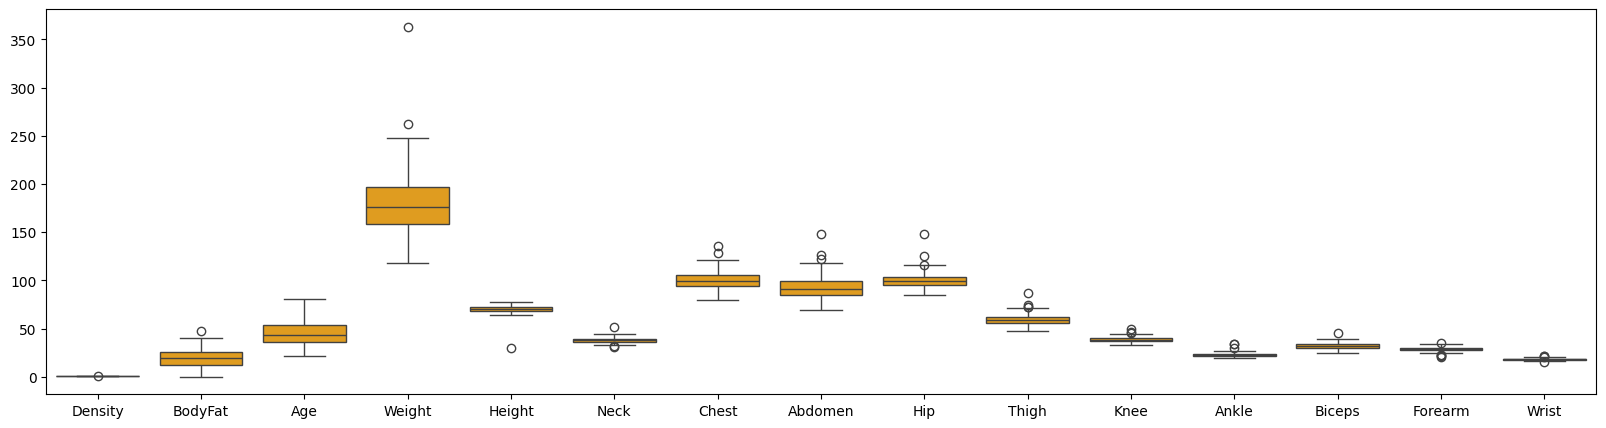

In [16]:
# Plot into boxplots
plt.figure(figsize = (20, 5))
sns.boxplot(data = body_fat_df, color = 'orange')

The BodyFat of 0.0 is not considered as an outlier. Let's find out if there are more of this value.

In [17]:
body_fat_df.sort_values(by = 'BodyFat', ascending = True)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,AgeGroup
181,1.1089,0.0,40,118.50,68.00,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5,Middle-Aged-Adult
171,1.0983,0.7,35,125.75,65.50,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9,Elderly
170,1.0926,3.0,35,152.25,67.75,37.0,92.2,81.9,92.8,54.7,36.2,22.1,30.4,27.4,17.7,Elderly
25,1.0911,3.7,27,159.25,71.50,35.7,89.6,79.7,96.5,55.0,36.7,22.5,29.9,28.2,17.7,Young-Adult
28,1.0910,3.7,27,133.25,64.75,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2,Young-Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1.0207,35.0,65,224.50,68.25,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4,Professional-Adult
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,Middle-Aged-Adult
191,1.0140,38.1,42,244.25,76.00,41.8,115.2,113.7,112.4,68.5,45.0,25.5,37.1,31.2,19.9,Middle-Aged-Adult
35,1.0101,40.1,49,191.75,65.00,38.4,118.5,113.1,113.8,61.9,38.3,21.9,32.0,29.8,17.0,Middle-Aged-Adult


According to the table above, there is only one instance with BodyFat quals to 0.0.

### 3.8 Univariate Analysis

Categorical / Qualitative

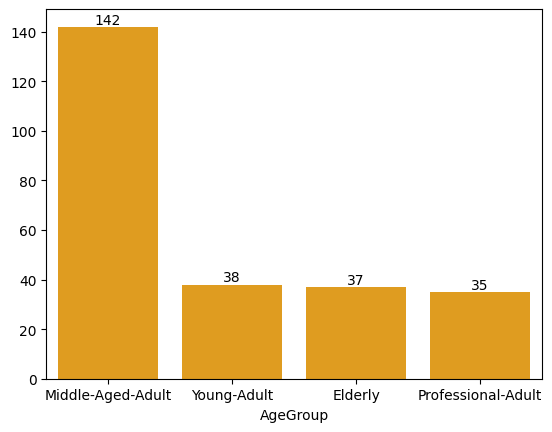

In [18]:
sns.barplot(x = body_fat_df['AgeGroup'].value_counts().index, y = body_fat_df['AgeGroup'].value_counts().values, color = 'orange')
for i, value in enumerate(body_fat_df['AgeGroup'].value_counts().values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

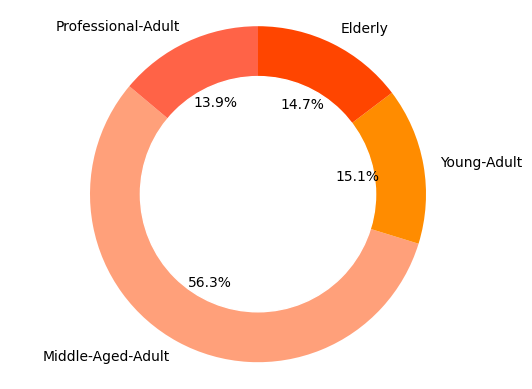

In [19]:
plt.pie(body_fat_df['AgeGroup'].value_counts(), labels=body_fat_df['AgeGroup'].value_counts().index, autopct='%1.1f%%', startangle=140, colors = ['#FFA07A', '#FF8C00', '#FF4500', '#FF6347', '#FF7F50', '#FFA500'])
circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(circle)
plt.axis('equal')
plt.show()

Numerical

#### 3.8.1 Distribution
Now, let's crosscheck it by plotting into a histogram.

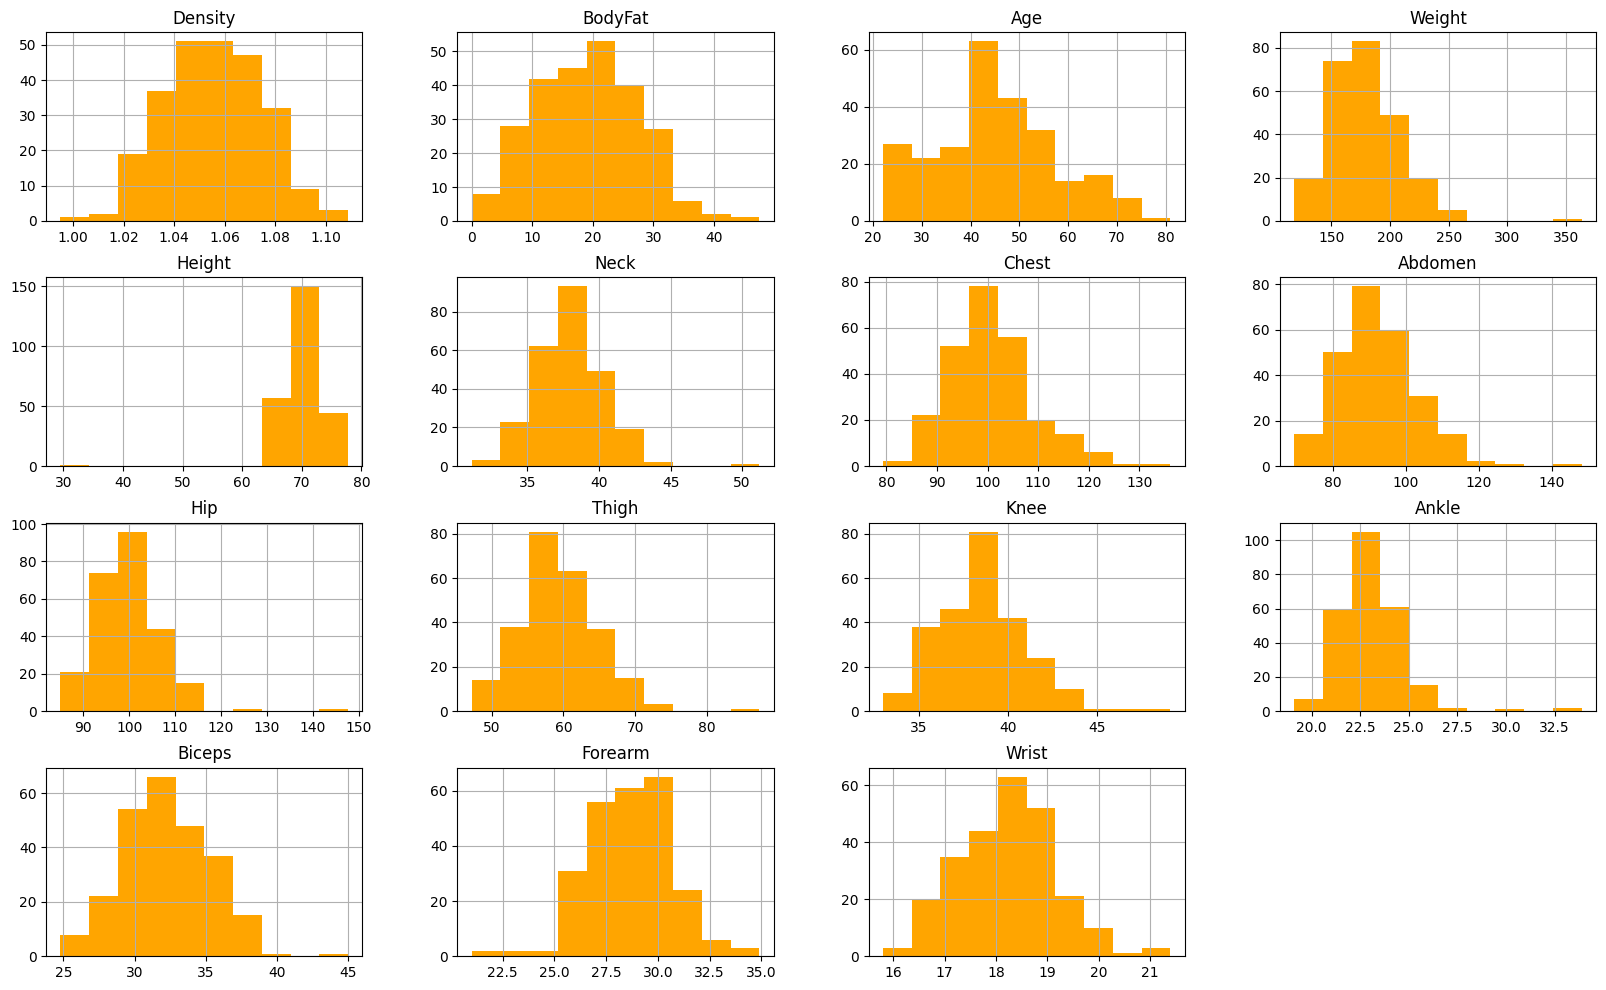

In [20]:
body_fat_df.hist(figsize=(20, 12), color='orange')
plt.show()

With the histograms above, we can have an initial idea of what attributes are closer to normality. We can go deeper by using the Anderson-Darling statistical test to check what distributions are and are not normal.

#### 3.8.2 Look for Normal Distribution
In this step, we are going to use the **statistical test Anderson-Darling (a goodness-of-fit test).** For this, we'll use:

  * H0 (Null Hypothesis): Distribution = Normal
  * HA (Alternative Hypothesis): Distribution ≠ Normal

For this test, we'll use:
  * Significance Level (α) = 0.05
  * Confidence Level (1 - α) = 0.95

For the Anderson-Darling test, if the `statistic < critical_values`, there are no enough evidences to reject the null hypothesis, meaning that the distribution could be normal.

First, we'll do for only one attribute.

In [21]:
# Calculating p-value and critical values
pvalue, critical_values, significance_level = anderson(body_fat_df['Density'], dist = 'norm')

# Print result
print(pvalue, critical_values, significance_level)

0.37975646740241586 [0.567 0.646 0.775 0.904 1.075] [15.  10.   5.   2.5  1. ]


Now, let's go for all attributes and plot into a bar chart for a better visualization.

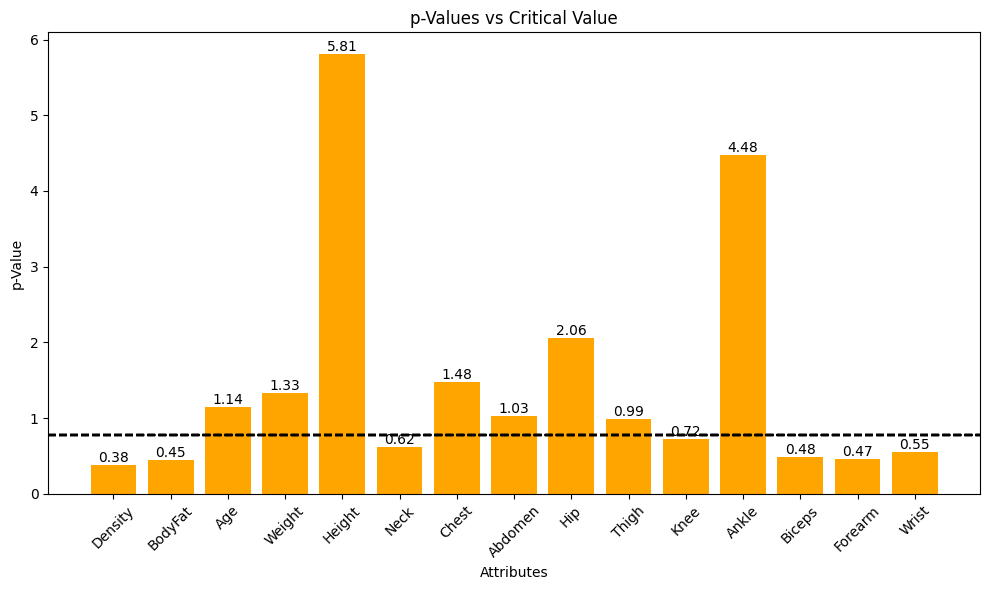

In [22]:
# Select only numeric columns
numeric_columns = body_fat_df.select_dtypes(include=['number'])

# Calculating p values and critical values
plt.figure(figsize=(10, 6))
for column in numeric_columns.columns:
    pvalue, critical_values, significance_level = anderson(body_fat_df[column], dist='norm')
    plt.bar(column, pvalue, color='orange')
    plt.axhline(critical_values[2], color='black', linestyle='--', label='Critical Value')
    plt.text(column, pvalue, f'{pvalue:.2f}', ha='center', va='bottom')

# Plot into a bar chart for a better visualization
plt.title('p-Values vs Critical Value')
plt.ylabel('p-Value')
plt.xlabel('Attributes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

So, the normal distributions (above the black line) are: **Density, Body Fat, Neck, Knee , Biceps, Forearm and Wrist.**

Let's now check the normality using charts. The closer to the line, more normal the distribution is.

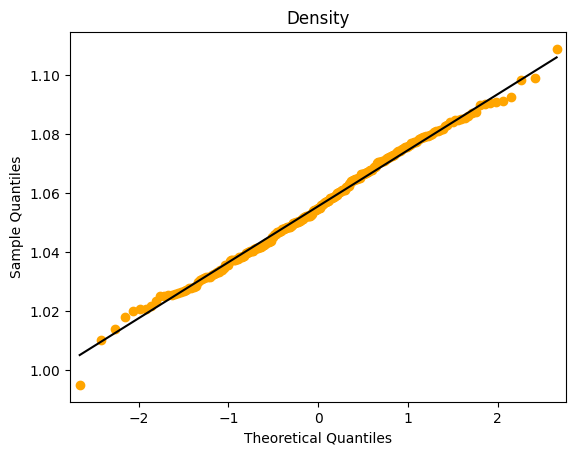

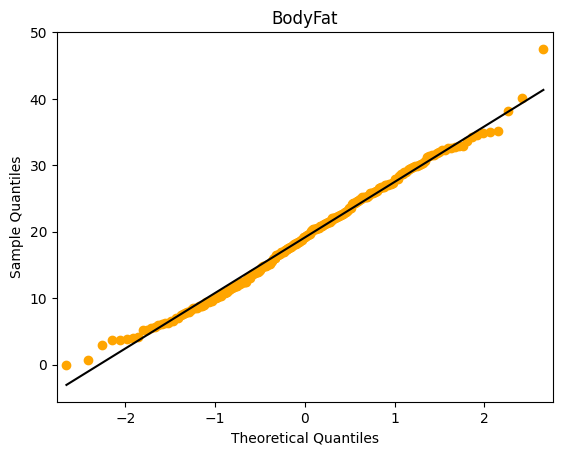

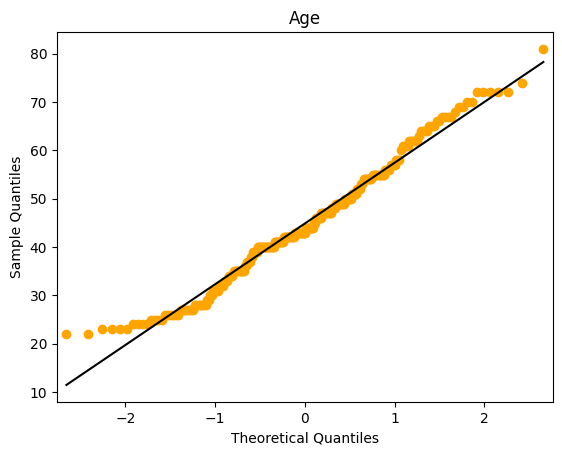

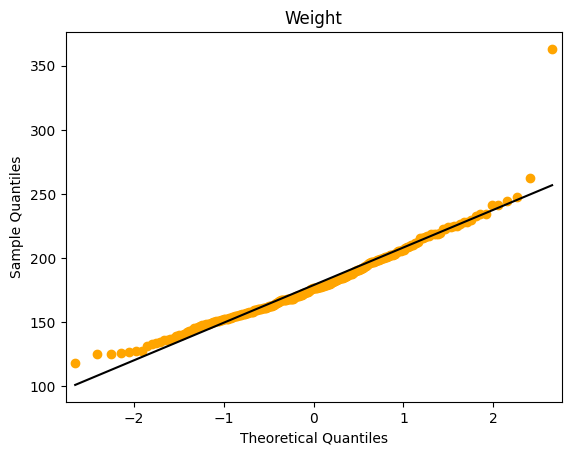

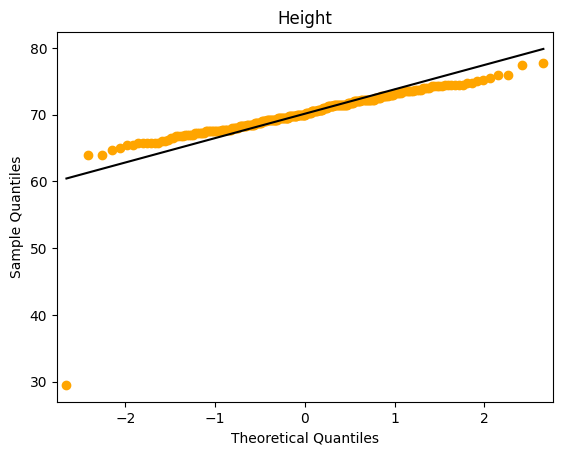

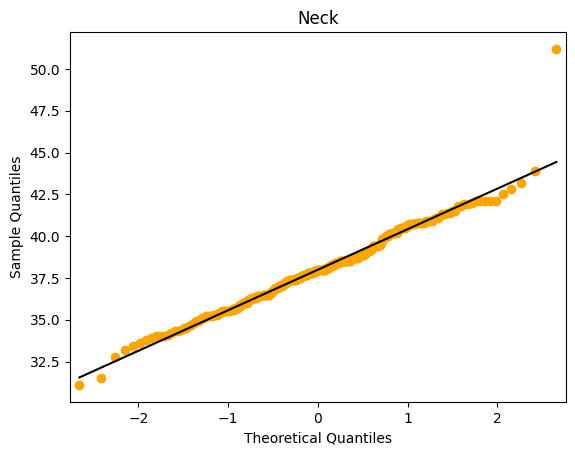

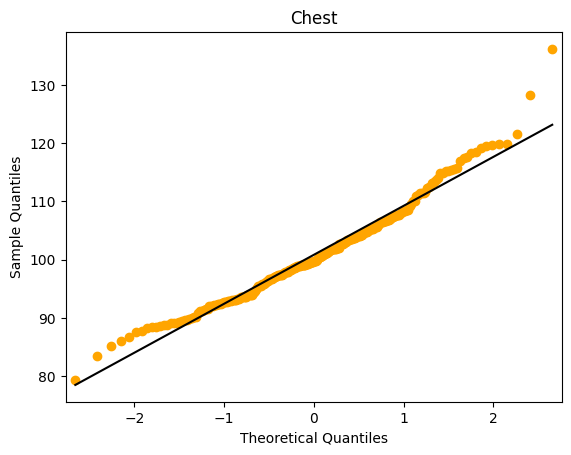

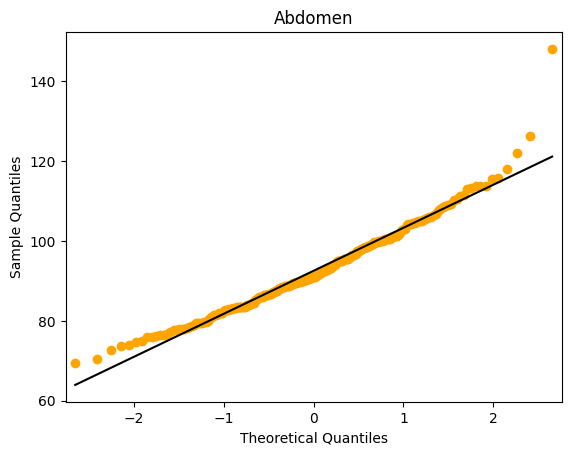

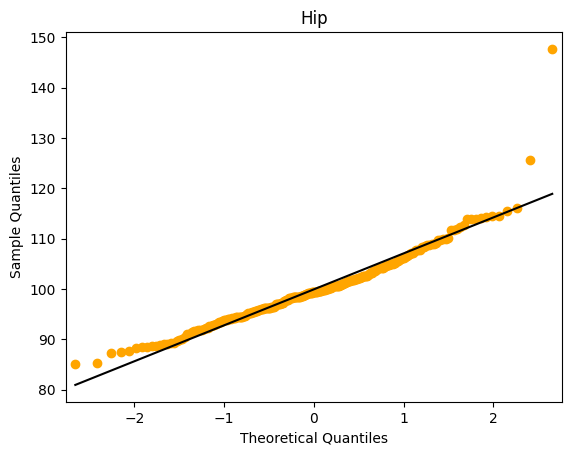

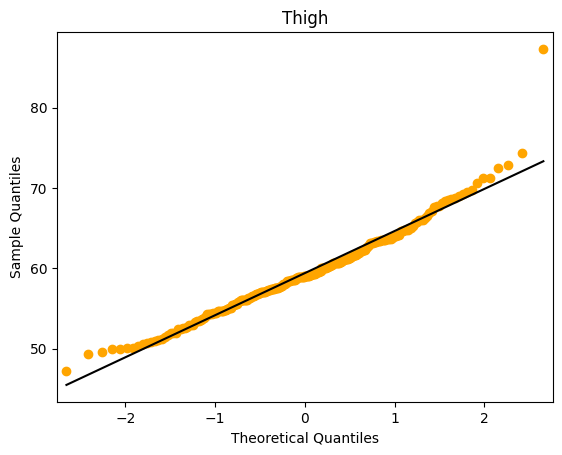

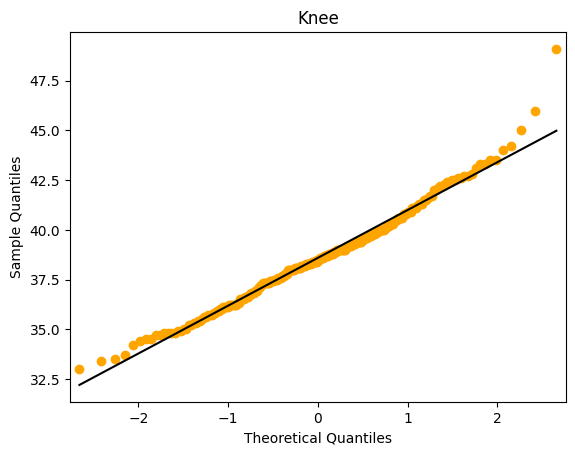

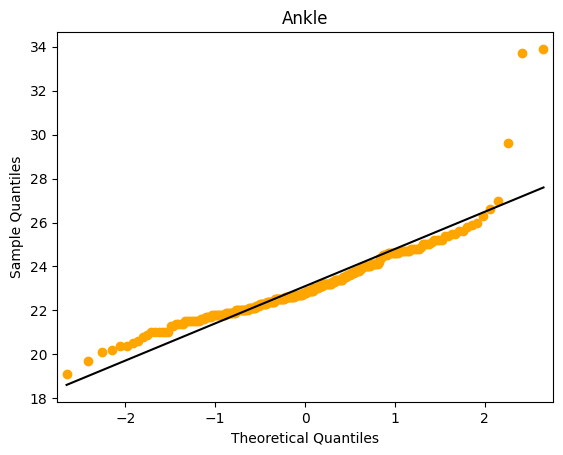

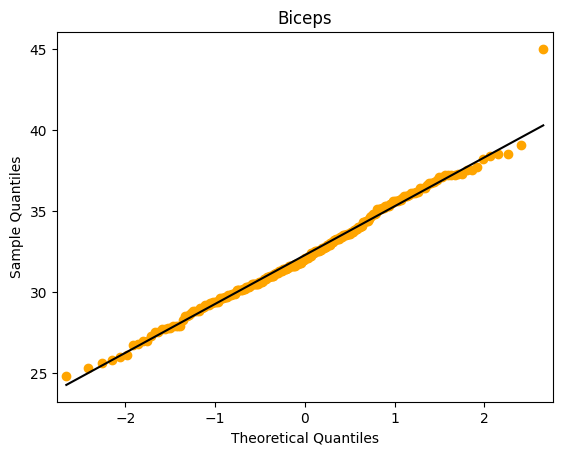

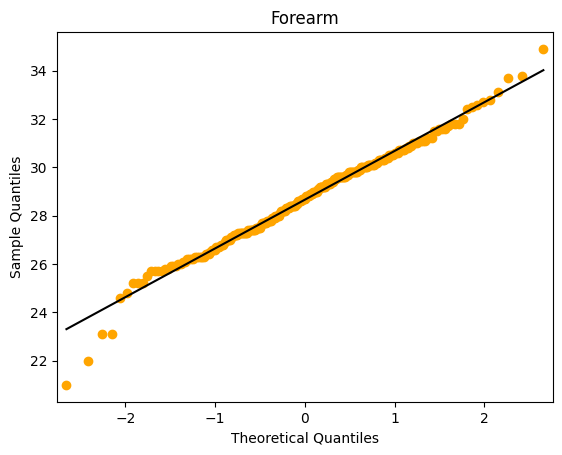

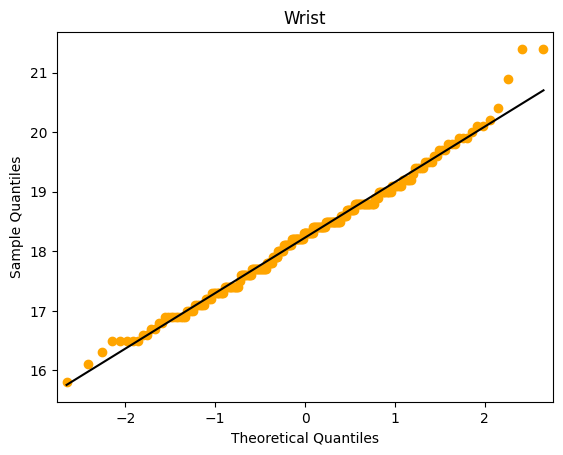

In [23]:
for column in numeric_columns.columns:
    fig = qqplot(body_fat_df[column], line='s', markerfacecolor='orange', markeredgecolor='orange')
    plt.title(column)
    fig.axes[0].get_lines()[1].set_color('black')
    plt.show()

As we can see, **the distributions that are not considered normal by the Anderson-Darling test are due to outliers.**

Not all the distributions are considered normal according to the Anderson-Darlin test.

**But, since our sample has n = 252, we could use the Central Limite Theorem, which states that a sample with n >= 30 can be considered as a Normal distribution for statistical inferences.**

### 3.9 Bivariate Analysis
For bivariate analysis, we should plot at first in a heatmap to understand the strogest correlations. We'll use pearson because most variables should follow linearity.

<Axes: >

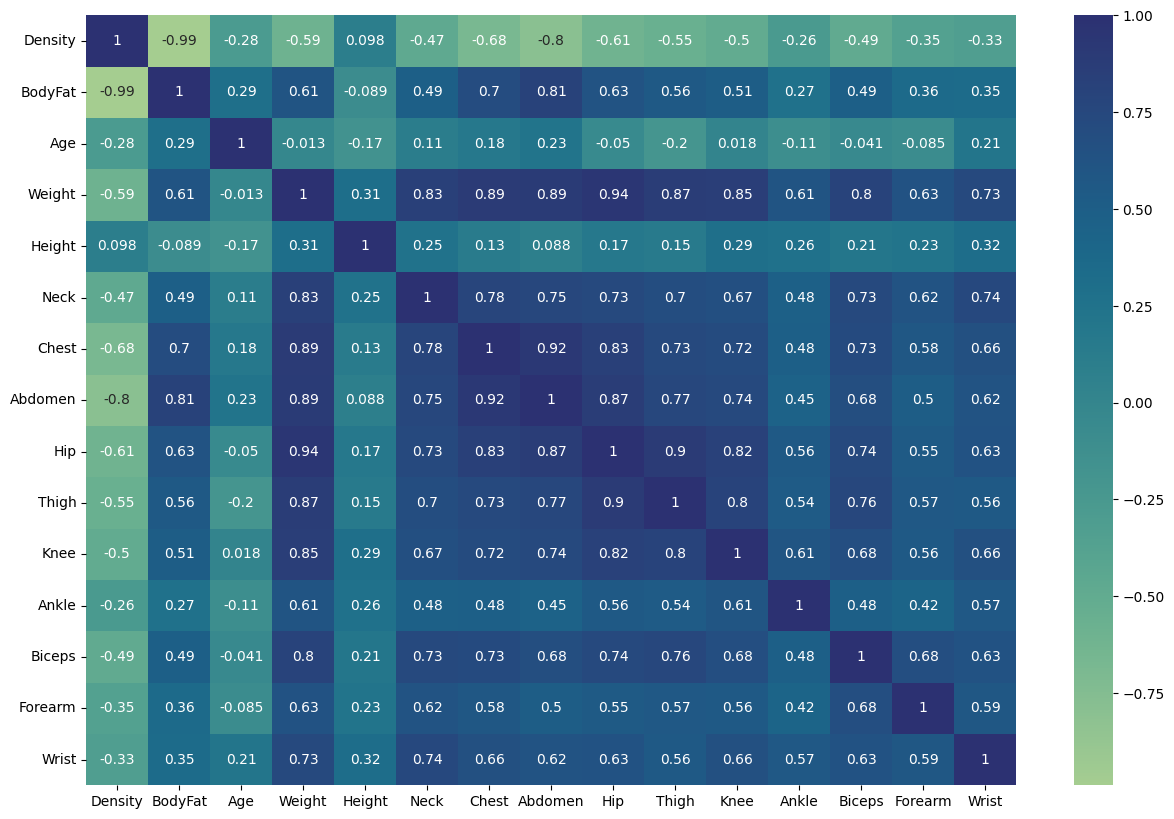

In [24]:
# Select only numeric columns
numeric_columns = body_fat_df.select_dtypes(include=['number'])

# Plotting into a heatmap
correlation = numeric_columns.corr(method = 'pearson')
plt.figure(figsize = (15,10))
sns.heatmap(correlation, annot = True, cmap = 'crest')

The Pearson correlation results reveal the relationship between body measurements and body fat percentage.

- Abdomen size shows the strongest correlation (0.813), indicating a significant association with body fat.
- Chest (0.703), hip (0.625), and weight (0.612) also exhibit moderate correlations.
- Thigh (0.560) shows a weaker relationship.
- These findings emphasize the importance of abdomen size in predicting body fat percentage, followed by chest, hip, weight, and thigh measurements, respectively.


**It is also important to check what variables (or features) could generate multicollinearity, since this is a premise that we must avoid in order to perform a linear regression.**

Positive Correlations (≥ 0.7)
- Hip and Weight: 0.94
- Abdomen and Chest: 0.92
- Hip and Thigh: 0.90
- Chest and Weight: 0.89
- Abdomen and Weight: 0.89
- Abdomen and Hip: 0.87
- Thigh and Weight: 0.87
- Knee and Weight: 0.85
- Weight and Neck: 0.83
- Hip and Chest: 0.83
- Hip and Knee: 0.82
- Abdomen and BodyFat: 0.81
- Weight and Biceps: 0.80
- Thigh and Knee: 0.80
- Chest and Neck: 0.78
- Abdomen and Thigh: 0.77
- Thigh and Biceps: 0.76
- Neck and Abdomen: 0.75
- Wrist and Neck: 0.74
- Hip and Biceps: 0.74
- Abdomen and Knee: 0.74
- Hip and Neck: 0.73
- Biceps and Neck: 0.73
- Thigh and Chest: 0.73
- Wrist and Weight: 0.73
- Biceps and Chest: 0.73
- Chest and Knee: 0.72
- BodyFat and Chest: 0.70

Negative Correlations (≤ -0.70)
- Abdomen and Density: -0.80
- Density and BodyFat: -0.99


Now, let's plot in pairs with out target column: `BodyFat`.

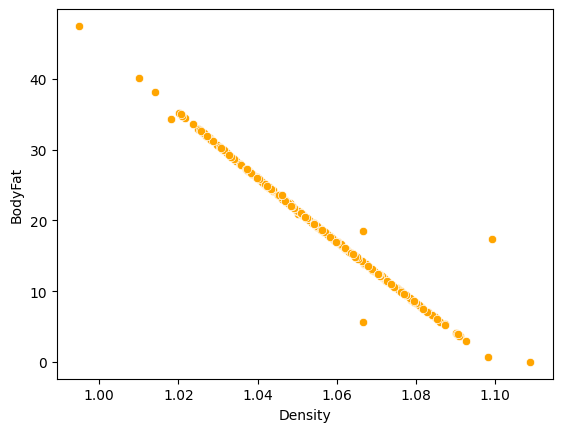

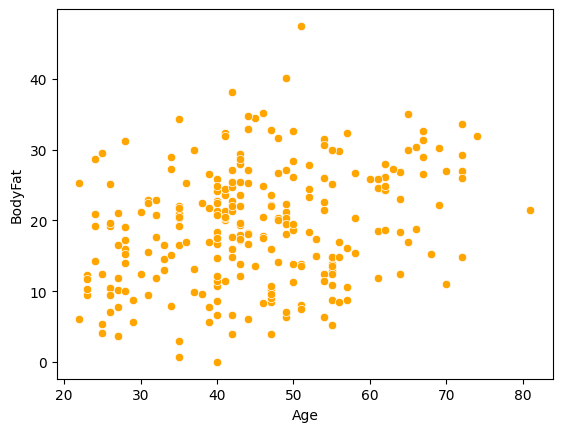

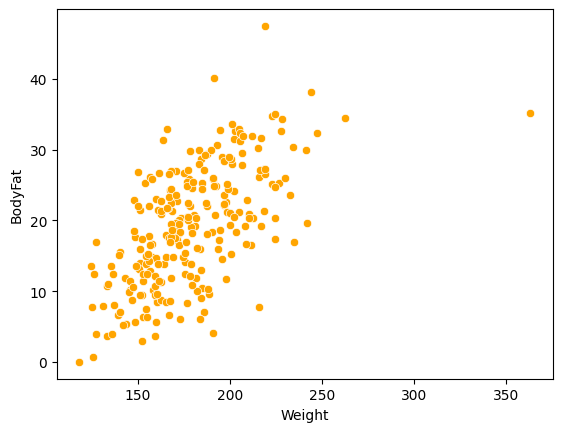

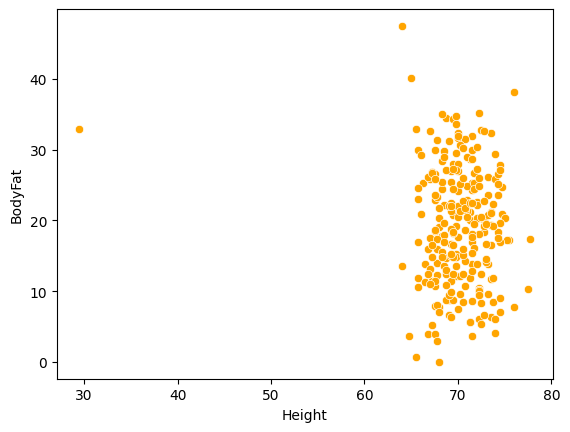

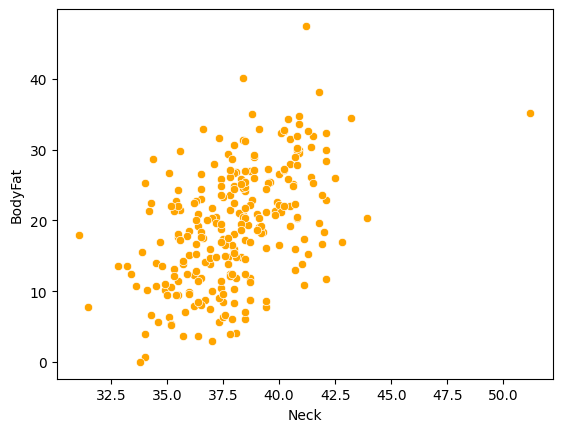

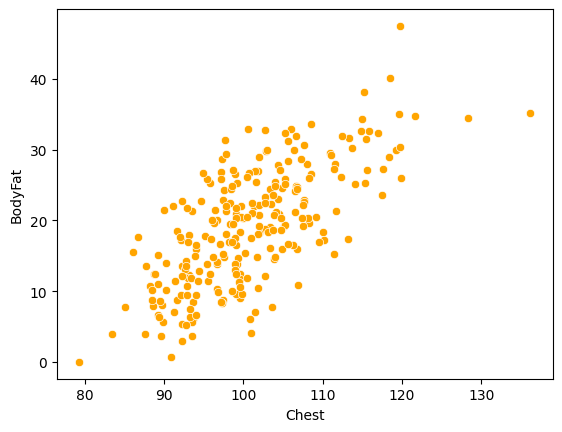

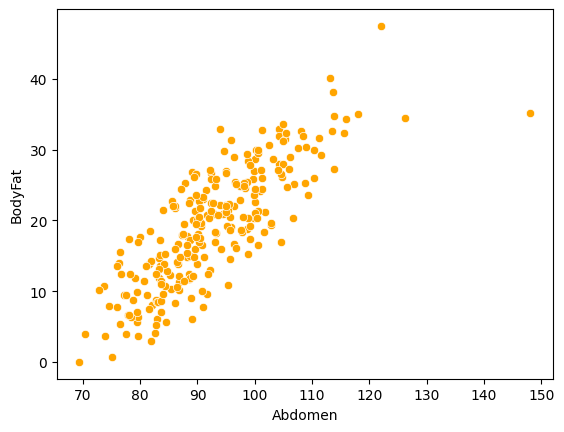

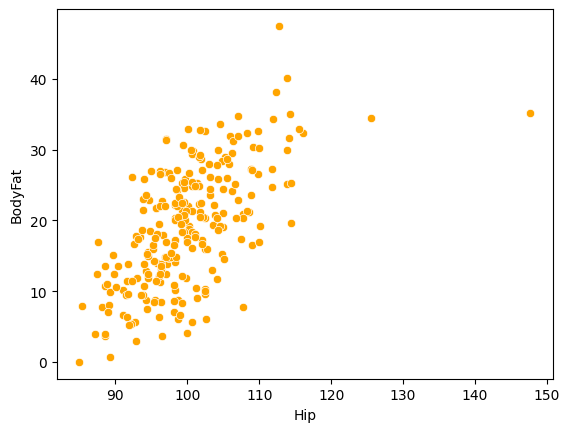

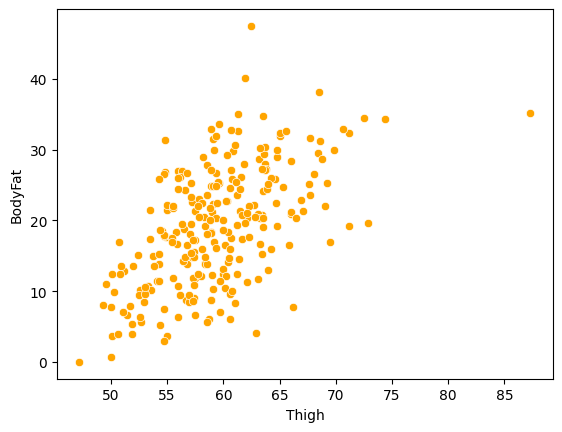

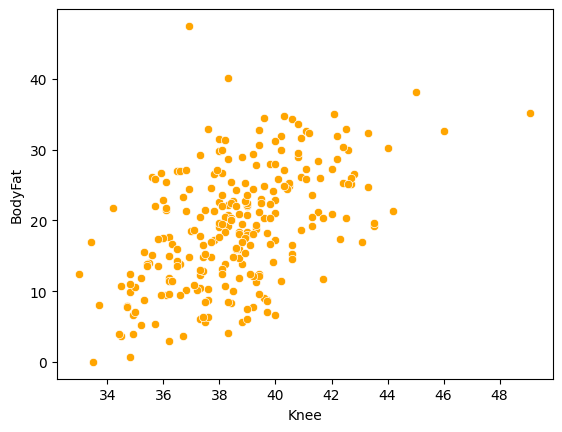

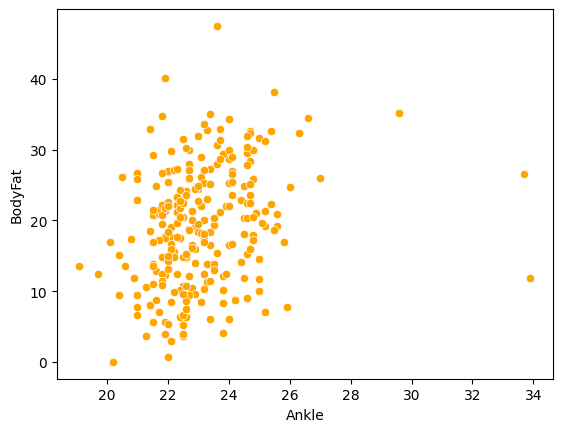

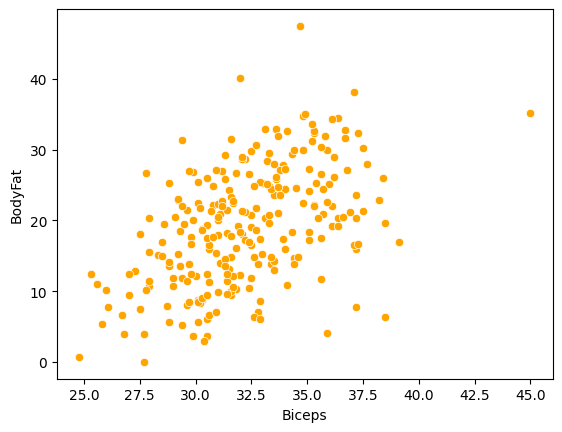

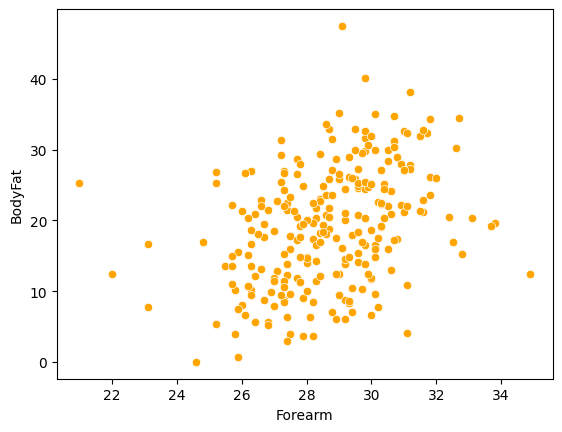

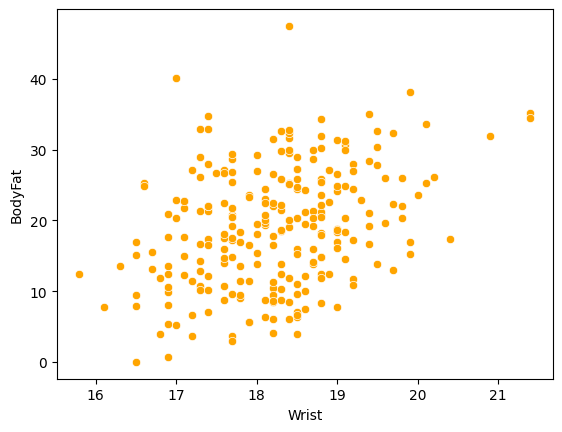

In [25]:
for column in body_fat_df.select_dtypes(exclude = 'object'):
  if column != 'BodyFat':
    sns.scatterplot(data = body_fat_df, x = column, y = body_fat_df['BodyFat'], color = 'orange')
    plt.show()

Now, let's check if there is any correlation between the age and the bodyfat.

In [26]:
# Creating grouped df
grouped_df = body_fat_df.groupby('AgeGroup')['BodyFat'].mean().round(2)

# Print
display(grouped_df)

,BodyFat
AgeGroup,
Elderly,17.63
Middle-Aged-Adult,19.55
Professional-Adult,24.31
Young-Adult,14.37


## 4 Statistical Inference

### 4.1 Population Body Fat Mean
Let's check if the bodyfat mean for this sample can be extended for a population.

In [27]:
# Calculating the BodyFat mean
mean_body_fat = body_fat_df['BodyFat'].mean()

# Print
mean_body_fat.round()

19.0

For this, we'll the confidence interval to infer about the population.

The question we'll be answeing is: **"Can the mean of the bodyfat percentage also be used to the population?"**

In [28]:
# Calculating the standard error
standard_error = stats.sem(body_fat_df['BodyFat'])

# Print
print(standard_error)

0.5271810933269659


The formula for the confidence interval of a mean with the populational standard deviation unkown is:

$\bar{x} \pm t_{\alpha} \cdot \frac{s}{\sqrt{n}}$

Where:
* x: sample mean
* tα: critical value from t student distribution
* s: sample standard deviation
* n: sample size



In [29]:
# Sample size
n = len(body_fat_df['BodyFat'])

# Degrees of freedom
df = n - 1

# Creating the confidence interval
lower_interval, upper_interval = st.t.interval(confidence = 0.95, df = df, loc = mean_body_fat, scale = standard_error)

# Print
print(f"The lower interval is {round(lower_interval,2)}% and the upper interval is {round(upper_interval,2)}%")

The lower interval is 18.11% and the upper interval is 20.19%


With this, we can state that with 95% of confidence, the average body fat of the population is between 18.11% and 20.19%.

### 4.2 Different Means of Ages
Let's check if the bodyfat mean is statistically different from the different ages of the sample.

First, we'll create four samples for each category.

In [30]:
# Divide the ages in 4 different datasets
middle_age = body_fat_df[body_fat_df['AgeGroup'] == 'Middle-Aged-Adult']
yound_adult = body_fat_df[body_fat_df['AgeGroup'] == 'Young-Adult']
elderly = body_fat_df[body_fat_df['AgeGroup'] == 'Elderly']
professional_adult = body_fat_df[body_fat_df['AgeGroup'] == 'Professional-Adult']

Now, since the premise of the ANOVA is having the same variance among all samples, we'll check it using Barlett Statistics.

$B = \frac{(N-k) \ln(S_p^2)}{ \sum_{i=1}^{k} (n_i - 1) \ln(S_i^2) }$


In [31]:
# Statistical test
statistic, p_value = bartlett(middle_age['BodyFat'], yound_adult['BodyFat'], elderly['BodyFat'], professional_adult['BodyFat'])

# Print result
print(f" The statistic is {statistic} and the p value is {p_value}")

 The statistic is 3.999986326344491 and the p value is 0.26146560646065026


Since H0 = variances are the same and H1 = variances are different, H0 cannot be rejected, so there are no evidences to reject the H0, meaning that the variances can be the same.

Now, we can go to ANOVA.

$F = \frac{\text{MS}_{\text{between}}}{\text{MS}_{\text{within}}}$

Where:

$\text{MS}_{\text{between}} = \frac{\text{SS}_{\text{between}}}{k - 1}$


$\text{MS}_{\text{within}} = \frac{\text{SS}_{\text{within}}}{N - k}$


In [32]:
# ANOVA
statistics, p_value = f_oneway(middle_age['BodyFat'], yound_adult['BodyFat'], elderly['BodyFat'], professional_adult['BodyFat'])

# Print
print(f"The statistics is {statistics} and the p-value is {p_value}")

The statistics is 10.084856144516264 and the p-value is 2.7127718550913662e-06


According to the results above, we can infer that the body fat from the four groups is different. With this, we can also statet that age influences in the body fat.

Now, we can check where are the differences using the tukey or tukey kremer statistics, the premises are:
* Normaly distributed (or CLT)
* Variances are the same (already tested)
* Samples have the same size (if not, use the tukey kremer, **the code is auto adjusted**)


In [33]:
# Statistics
tukey = pairwise_tukeyhsd(endog=body_fat_df['BodyFat'], groups=body_fat_df['AgeGroup'], alpha=0.05)

# Print
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------
           Elderly  Middle-Aged-Adult   1.9279 0.5548  -1.8668  5.7226  False
           Elderly Professional-Adult   6.6873 0.0024   1.8397 11.5348   True
           Elderly        Young-Adult  -3.2586 0.2878  -8.0068  1.4896  False
 Middle-Aged-Adult Professional-Adult   4.7594 0.0092   0.8796  8.6391   True
 Middle-Aged-Adult        Young-Adult  -5.1865 0.0024  -8.9414 -1.4316   True
Professional-Adult        Young-Adult  -9.9459    0.0 -14.7623 -5.1294   True
-----------------------------------------------------------------------------


## 5 Pre Processing
Here, we'll perform some changes in our dataset in order to have all numerical columns for the linear regression.

In [34]:
#  One-Hot Encoding
body_fat_encoded = pd.get_dummies(body_fat_df['AgeGroup'], prefix='AgeGroup')

# Concatenat datasets
body_fat_df = pd.concat([body_fat_df, body_fat_encoded], axis=1)

# Drop string column
body_fat_df = body_fat_df.drop(columns = ['AgeGroup'])

# From boolean to int
body_fat_df[body_fat_encoded.columns] = body_fat_df[body_fat_encoded.columns].replace({False: 0, True: 1})

# Print
display(body_fat_df)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,AgeGroup_Elderly,AgeGroup_Middle-Aged-Adult,AgeGroup_Professional-Adult,AgeGroup_Young-Adult
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0,0,0,1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0,0,0,1
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0,0,0,1
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,0,0,0,1
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,0,0,1,0
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,0,0,1,0
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,0,0,1,0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,0,0,1,0


## 5 Linear Regression

To perform the linear regression, the target attribute (bodyfat) , which should be the dependent one, set as y or f(x), should be continuous. In this case, the BodyFat is a float, so, we can continue the regression.

In order to perform a linear regression, there are several premises that we must attend.

First, we'll create a variable for our independent attribute (Abdomen) and to our dependent attribue (BodyFat) and plot into the model from OLS.

Than, we apply OLS (Ordinary Least Squares) and 'fit' the model. **OLS attempts to find the best parameters for the equation's coefficients, ensuring the best fit. It works to minimize the 'distance' between the data points and the regression line**

**The main process is to apply the OLS and than check, by the premisses, if we could trust in its results.**

### 5.1 Premise 1 - Linearity
The relationship between the variables must be LINEAR.

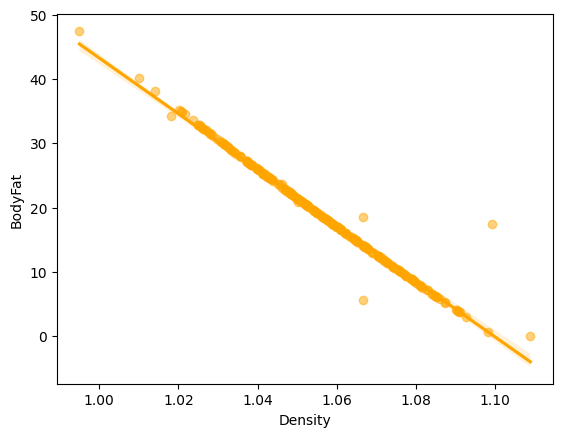

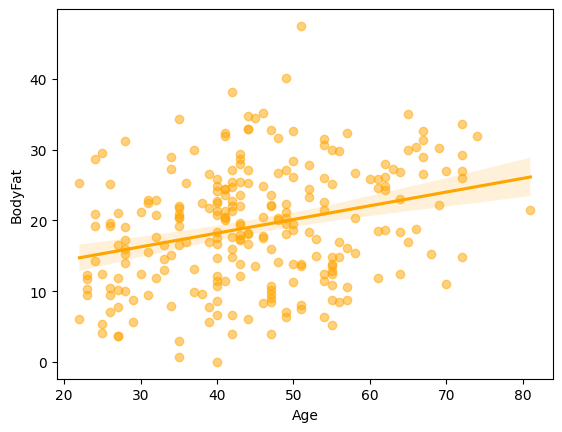

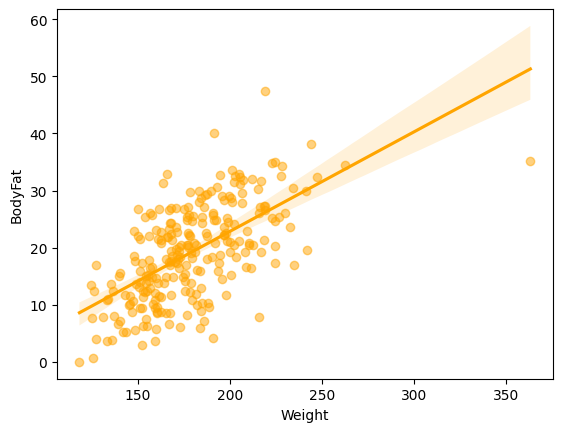

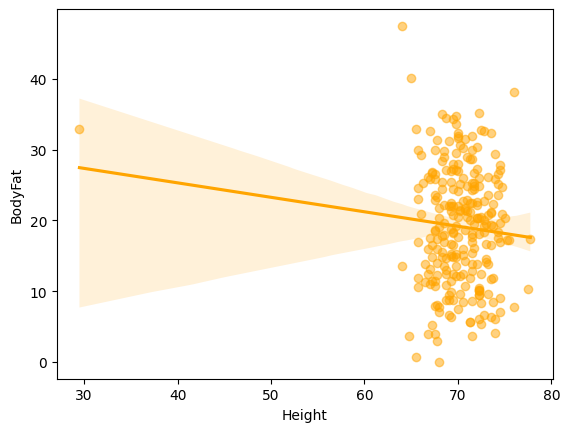

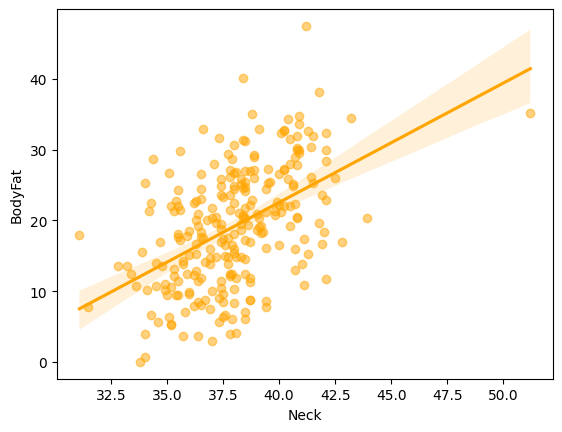

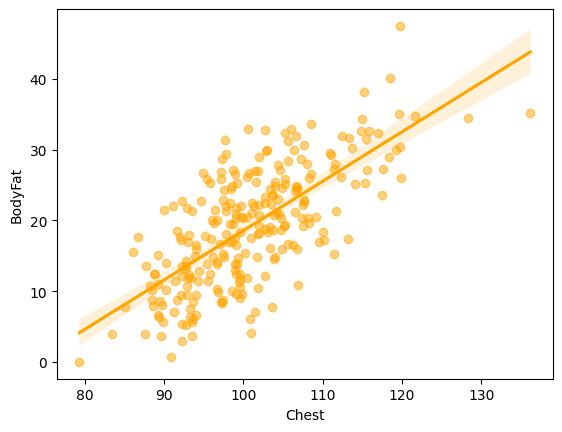

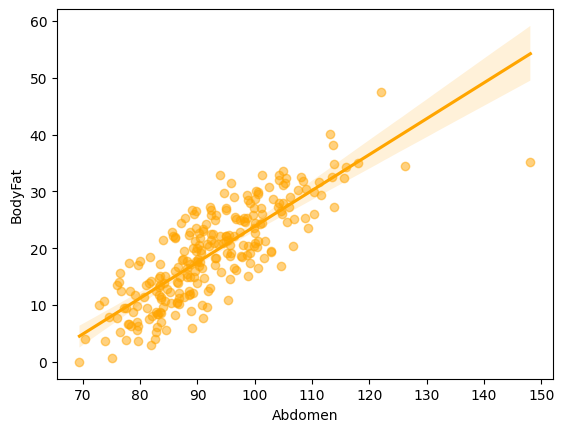

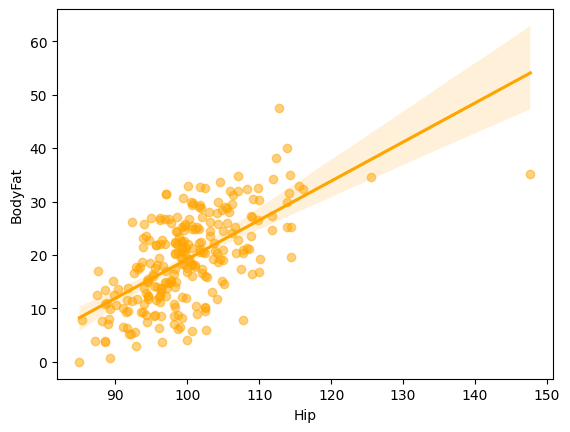

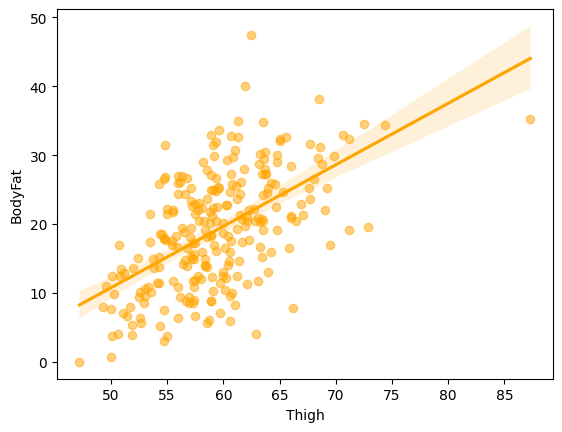

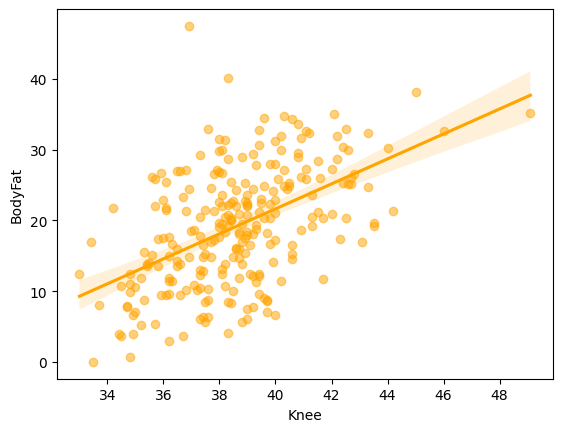

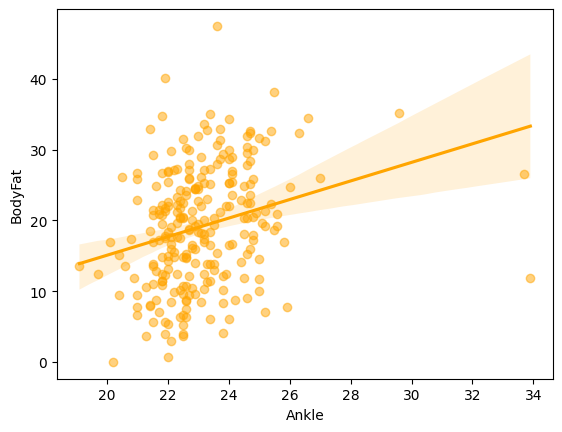

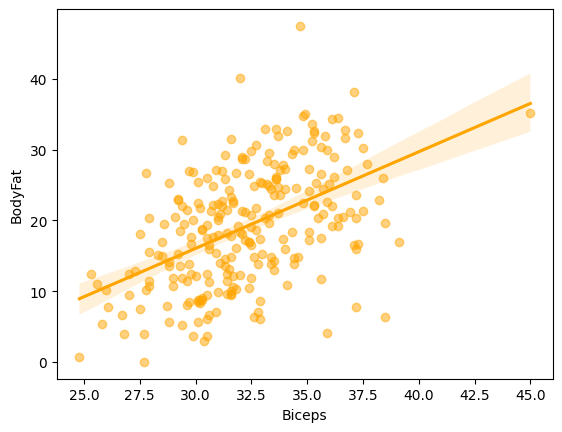

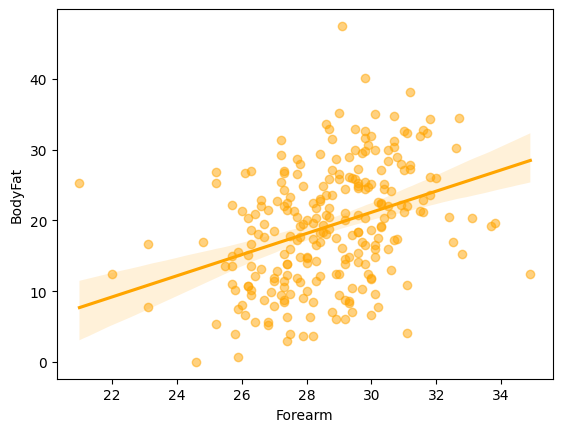

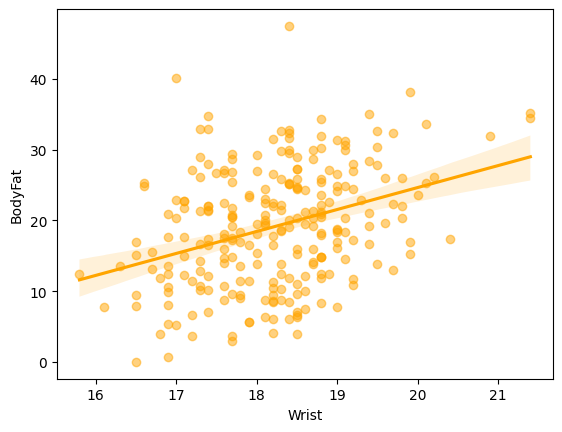

In [35]:
# Create a regplot chart
for column in body_fat_df.select_dtypes(exclude='object'):
    if column != 'BodyFat' and not column.startswith('AgeGroup'):
        sns.regplot(data=body_fat_df, x=column, y='BodyFat', scatter_kws={'alpha': 0.5}, order=1, color='orange')
        plt.show()

Let's use the Pearson's correlation (since we want to measure the linear correlation between BodyFat and other variables. Its formula is:


$r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n \sum x^2 - (\sum x)^2][n \sum y^2 - (\sum y)^2]}}$


In [36]:
# Check most correlated variables
for column in body_fat_df.select_dtypes(exclude='object'):
    if column != 'BodyFat':
      r, p_value = pearsonr(body_fat_df[column], body_fat_df['BodyFat'])
      print(f"The correlation of pearson for BodyFat and {column} is {r}, with p_value of {p_value}")

The correlation of pearson for BodyFat and Density is -0.9877824021639866, with p_value of 7.536417681457462e-204
The correlation of pearson for BodyFat and Age is 0.29145844013522193, with p_value of 2.522101030860978e-06
The correlation of pearson for BodyFat and Weight is 0.6124140022026475, with p_value of 2.4731162567909275e-27
The correlation of pearson for BodyFat and Height is -0.0894953798544018, with p_value of 0.15663625668779393
The correlation of pearson for BodyFat and Neck is 0.4905918534410399, with p_value of 1.1471392370206287e-16
The correlation of pearson for BodyFat and Chest is 0.7026203388938644, with p_value of 8.085369499605935e-39
The correlation of pearson for BodyFat and Abdomen is 0.8134322847810492, with p_value of 9.090066724699334e-61
The correlation of pearson for BodyFat and Hip is 0.6252009175086621, with p_value of 9.819009608849599e-29
The correlation of pearson for BodyFat and Thigh is 0.5596075319940895, with p_value of 3.6128624717765203e-22
The 

In [37]:
correlated_columns = []

# Check most correlated variables
for column in body_fat_df.select_dtypes(exclude='object'):
    if column != 'BodyFat':
      r, p_value = pearsonr(body_fat_df[column], body_fat_df['BodyFat'])
      if (r >= 0.30 and p_value <= 0.05) or (r <= -0.3 and p_value <=0.05):
        correlated_columns.append(column)

print(correlated_columns)

['Density', 'Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Biceps', 'Forearm', 'Wrist']


As we saw above, it is possible to verify that there is a possibly linear relationship for BodyFat with: 'Density', 'Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Biceps', 'Forearm', 'Wrist'

### 5.2 Premise 2 - Multicollinearity
In this step, we need to understand if there are relationships between the independent variables (meaning: if they could be dependent aswell). For this, we'll use the VIF (variance inflaction factor):

$VIF_i = \frac{1}{1 - R^2_i}$


**R² is the coefficient of determination,** a statistical measure that indicates the proportion of variance in the dependent variable that can be explained by the independent variables in a regression model. In other words, it shows how well the data fits the model.

In [38]:
# Creating variable for independent variables
X = body_fat_df[['Weight', 'Neck', 'Hip', 'Thigh', 'Knee', 'Biceps', 'Forearm', 'Wrist', 'Density', 'Chest', 'Abdomen']]

# Calculating VIF
VIF = pd.DataFrame()
VIF['Variable'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print
print(VIF)

   Variable          VIF
0    Weight   674.450321
1      Neck  1057.246743
2       Hip  2685.999704
3     Thigh   848.041158
4      Knee  1054.711014
5    Biceps   413.647711
6   Forearm   428.936314
7     Wrist  1120.839582
8   Density  1781.150678
9     Chest  1277.225122
10  Abdomen   828.400945


The VIF's are too high for all features. Knowing this, we must choose only one feature in order to don't affect the coeficients from our regression. There are Density and Chest. Since **Density** is the most correlated, we'll use it.

### 5.3 Premise 3 - Homoscedasticity
It refers to the assumption that the variance of the residuals (errors) is constant across all levels of the independent variable in a regression model.
The mean of all the residuals should be zero.

**From now on, we need to fit our model and create our regression line.**

In [39]:
# Attributing the dependent variable to y and the independent variable to X
X = body_fat_df.loc[:, body_fat_df.columns != 'BodyFat']
y = body_fat_df['BodyFat']

# Creating the best line between both of the attributes. This is called "to fit the model". That is why we're using the .fit()
model = ols('BodyFat ~ Density ', data = body_fat_df).fit()

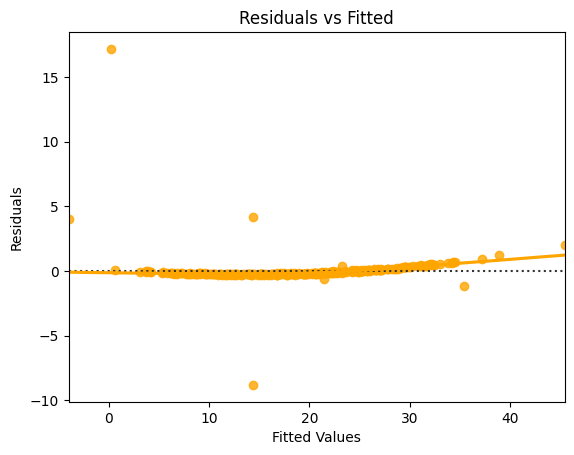

In [40]:
# Create the residual plot
fig, ax = plt.subplots(1, 1)
sns.residplot(x = model.fittedvalues, y = model.resid, lowess=True, ax=ax, color = 'orange')
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
plt.show()

In [41]:
# Calculate the mean
print(f" The mean of the residuals is {abs(round(model.resid.mean(),4))}")

 The mean of the residuals is 0.0


Since the value of the mean from the residuals is 0, and the values are well distributed this premise is attended.

**Chart interpretation:**

X-Axis (Predicted Values): This axis shows the values predicted by the model, in this case, body fat (the values calculated using the regression equation), meaning those that are part of the line equation (which are right on top).

Y-Axis (Residuals): This axis represents the residuals, which are the differences between the observed values and the predicted values. If a point is above zero, it means the model underestimated the value; if it is below zero, the model overestimated.

Horizontal Line at Zero: The horizontal line (usually dashed) at zero serves as a reference. The residuals should be randomly distributed around this line.

LOWESS Smoothing (if applied): If you use the parameter lowess=True, a smoothed line will be drawn on the graph. This line can help visualize the trend of the residuals in relation to the predicted values.

We could also check by using the Breusch-Pagan test to check if the non constant variances from the errors.

In [42]:
# Performing the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

# Results
bp_statistic = bp_test[0]
bp_p_value = bp_test[1]

# Print
print('Statistic:', round(bp_statistic,4))
print('P-value:', round(bp_p_value,4))

Statistic: 6.0516
P-value: 0.0139


Since p-value is lower than 0.05, **we cannot reject the hyphotesis of having a heteroscedasticity.**

### 5.4 Premise 4 - Exogeneity
The residuals cannot be correlated to the independent variables (all of them).

Text(0, 0.5, 'Residual')

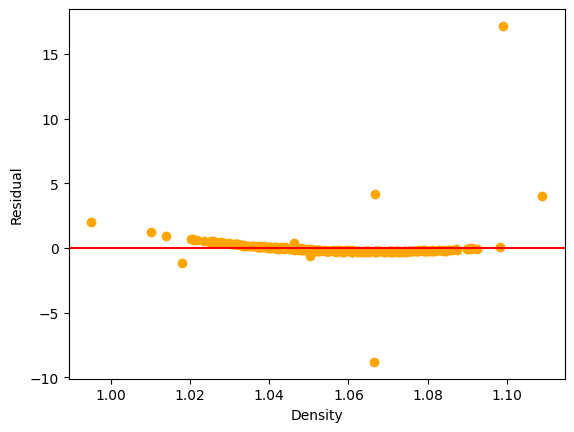

In [43]:
# Creating a copy of our dataset
df_resid = body_fat_df.copy()

# Adding a Residual attribue
df_resid['Residual'] = model.resid

# Plot
plt.scatter(df_resid['Density'], df_resid['Residual'], color = 'orange')
plt.axhline(0, color = 'red')
plt.xlabel('Density')
plt.ylabel('Residual')

In [44]:
# Use Pearson to check correlation
correlation, p_value = pearsonr(df_resid['Density'], df_resid['Residual'])

# Print result
print(f"Since p-value is {p_value} and pearson correlation is {correlation}, we can state with 95% of confidence that there is no correlation between the independent variable Neck and the residuals.")

Since p-value is 0.9999999999999944 and pearson correlation is -4.657732532997727e-16, we can state with 95% of confidence that there is no correlation between the independent variable Neck and the residuals.


Since the pearson is too low and the p-value is almost 1, we can say with a 95% of confidence that there is no correlation between density and the residuals.

### 5.4 Premise 4 - Residual Autocorrelation
Residuals cannot be autocorrelated. It means that the residuals cannot predict itself.

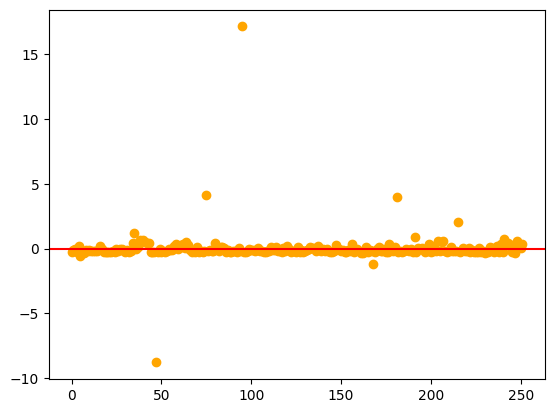

In [45]:
# Creating a new df
df_auto = model.resid

# Reseting the index and renaming it
df_auto = df_auto.reset_index()

# Rename columns
df_auto.columns = ['index', 'Resid']

# Plotting
plt.scatter(df_auto['index'], df_auto['Resid'], color = 'orange')
plt.axhline(0, color = 'red')

We could also use the statisical test Durbin Walson. This test is used to understand if a variable is autocorrelated. The closest to 2, better the probability of the variable not be autocorrelated (we could use between 1 and 3 as acceptable)

In [46]:
# Test
durbin_watson(model.resid)

2.004107398162793

As we can see by the chart and by the test, there is no correlation between the residuals.

### 5.6 Premise 6 - Outliers in the residuals
Here we need to understand if there are outliers in the residuals because it can influence the final result of the prediction. We should check if the  residuals are betweeb -3 or higher than +3.

First, let's calculate the influence. It measures the impact of each point in our model. It measures how much a remotion of an addition of a point affects the model. We use the Cook's Distance.

In [47]:
# Create instance of influence
influence = model.get_influence()

Now, calculate the leverage, which is a measure that reflects the position of a data point relative to the other points in the predictor space. Observations with high leverage are those that are far from the mean of the predictor values.

In [48]:
# Leverage -> calcula alavancagem
leverage = influence.hat_matrix_diag

Now, calculate the standardize residuals, which is a way to evaluate the discrepancy among the observed values and the predicted ones, considering the variability of data. They are used to assess the quality of the model fit. They indicate the discrepancy between observed and predicted values, adjusted for the variability in the data.

In [49]:
# standardize residuals -> padronizando os resíduos
standardize_residuals = influence.resid_studentized_internal

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

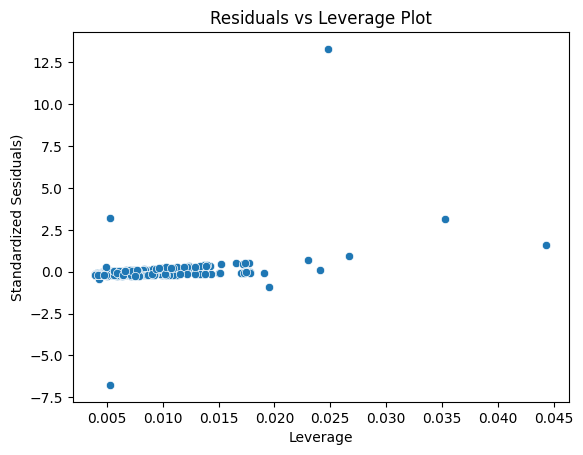

In [50]:
# Creating empty dataframe
df_leverage = pd.DataFrame()

# Creating leverage column
df_leverage ['leverage'] = leverage

# Creating a standardize residuals column
df_leverage['standardize_residuals'] = standardize_residuals

# Checking by plotting
fig = sns.scatterplot(x = df_leverage.leverage, y = df_leverage.standardize_residuals)
fig.set_xlabel('Leverage')
fig.set_ylabel('Standardized Sesiduals)')
fig.set_title('Residuals vs Leverage Plot')

In [51]:
# Check in a table
df_leverage['standardize_residuals'].describe()

,standardize_residuals
count,252.000000
mean,0.000984
std,1.008457
min,-6.755690
25%,-0.183879
50%,-0.126324
75%,0.031580
max,13.293749


The values should be between 3 and 3.
This can also be seen with the max and min value from describe code.

So, as we can see there are some outliers in the positive and negative side.

In [52]:
# Remove values outside the threshold of -3 and 3
df_leverage = df_leverage[(df_leverage['standardize_residuals'] >= -3) & (df_leverage['standardize_residuals'] <= 3)]

In [53]:
# Check again
df_leverage['standardize_residuals'].describe()

,standardize_residuals
count,248.000000
mean,-0.050770
std,0.224133
min,-0.905232
25%,-0.183879
50%,-0.127486
75%,0.015520
max,1.595597


Now, we can continue!

### 5.7 Premise 7 - Residuals Normal Distribution
Residuals should have a normal distribution.

KS Statistics: 0.358790383981215
P-value: 1.498751372768652e-29


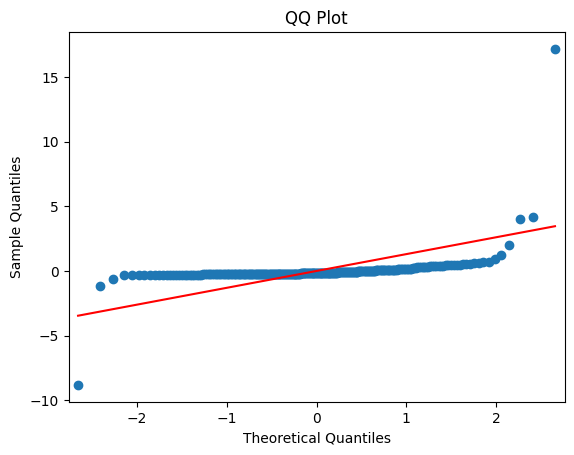

In [63]:
# KS Test
ks_statistic, p_value = stats.kstest(model.resid, 'norm')
print("KS Statistics:", ks_statistic)
print("P-value:", p_value)

# Plotting
fig, ax = plt.subplots(1,1)
sm.ProbPlot(model.resid).qqplot(line = 's', ax = ax)
ax.title.set_text('QQ Plot')
plt.show()

As we can see above, the last premise is not completely attended, since the residuals does not follows a normal distribution.

**Since this is the only premise that is not attended, we'll choose to continue with the model.**

### 5.8 Model Evaluation


In [55]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.004e+04
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          7.54e-204
Time:                        00:18:06   Log-Likelihood:                -424.00
No. Observations:                 252   AIC:                             852.0
Df Residuals:                     250   BIC:                             859.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    477.6499      4.576    104.389      0.0

We can find the equation of the line using the formula below.

In [56]:
# Collecting the intercep (angular coefficient), in the equation f(x) = ax + b, it's the b.
intercept = model.params['Intercept']

# Collecting the value of a from the equation f(x) = ax + b
coef_bodyfat = model.params['Density']

# Printing results in the equation
print(f"Regression equation: f(x) = {intercept.round(2)} + {coef_bodyfat.round(2)} * x")

Regression equation: f(x) = 477.65 + -434.36 * x


According to the summary:
* The model explains 97.6% of the data
* R adjusted is not used because we ended up doing a simple linear regression
* T TEST (P > | t |): P value shows the significance of each variable for the model, since is lower than 0.05 for the intercept and density, which means that we can trust the result
* F TEST (f statistic): has H0 = the designed model and a model without predictors, only with the intercept, are the same and HA = the models are different. Since F =  1.004e+04, the models are different


### 5.9 Model Predict

In [57]:
# Creating a dataset for predict the values
df_predict = pd.read_csv('https://raw.githubusercontent.com/bbucalonserra/body-fat-prediction/main/bodyfat.csv', encoding = 'ascii')

In [58]:
# Collecting our independent variable
X = df_predict['Density']

# Predict
prediction = round(model.predict(X), 1)

# Adding the prediction column in the dataset
df_predict['predicted_body_fat'] = prediction

# Print
df_predict[['Density', 'BodyFat', 'predicted_body_fat']]

,Density,BodyFat,predicted_body_fat
0,1.0708,12.3,12.5
1,1.0853,6.1,6.2
2,1.0414,25.3,25.3
3,1.0751,10.4,10.7
4,1.0340,28.7,28.5
...,...,...,...
247,1.0736,11.0,11.3
248,1.0236,33.6,33.0
249,1.0328,29.3,29.0
250,1.0399,26.0,26.0


We could also calculate the evaluation metrics for linear regression in machine learning, they are: MSE, MAE, R² (already calculated) and RMSE.

In [72]:
# Creating lists
y_true = df_predict['BodyFat']
y_pred = df_predict['predicted_body_fat']

# Calculating the MSE
mse = mean_squared_error(y_true, y_pred)

# Calculating the MAE
mae = mean_absolute_error(y_true, y_pred)

# Calculating the R²
r2 = r2_score(y_true, y_pred)

# Calculating the RMSE
rmse = np.sqrt(mse)

# Print
print(f"MSE: {round(mse,4)}")
print(f"MAE: {round(mae, 4)}")
print(f"R²: {round(r2, 4)}")
print(f"RMSE: {round(rmse, 4)}")

MSE: 1.6994
MAE: 0.3579
R²: 0.9756
RMSE: 1.3036


The mean squared error penalizes the outliers from the model because it is elevated to 2. The mean absolute error is in the same format from the values of y, so it's better to visualize. RMSE is simply the square of MSE.

As we can see, according to the MAE, the data from bodyfat values only vary 0.3579, which is an excellent result.

## 6 Final Results

In our linear regression analysis, we utilized only one feature due to multicollinearity, indicated by high variance inflation factor (VIF) values.

Multicollinearity occurs when independent variables are highly correlated, which can distort the model’s estimates. The dataset had limitations, as all variables were human measurements from various body parts, such as arms, hips, and ankles, which are often correlated with one another.

For linear regression, examining the attributes initially is a valuable approach to assess potential multicollinearity and understand variable relationships before conducting any in-depth analysis.

Additionally, two key assumptions of the regression model—linearity and homoscedasticity—were violated. Despite these challenges, we achieved impressive results. Our exploratory data analysis demonstrated an inverse correlation between density and body fat, as evidenced by the Pearson correlation coefficient.